In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import IPython.display

In [2]:
IPython.display.set_matplotlib_formats('pdf', 'svg')

In [3]:
# Float boundarys
MAX_FLOAT = np.finfo(np.float).max
MIN_FLOAT = np.finfo(np.float).min
EPS_FLOAT = np.finfo(np.float).eps

# Time credentials
SAMPLE_RATE = 0.25

# System credentials
TAU_LOWPASS = 1

In [4]:
# Zeitachse
x = np.arange(start=0., stop=6.5, step=SAMPLE_RATE)

# Eingangsfunktionen
y_sin = np.sin(x)
y_rec = np.array([1. if 1 < x < 3 else 0. for x in x])
# 1/SAMPLE_RATE because area dirac = 1
y_dir = np.array([1/SAMPLE_RATE if x == 1. else 0 for x in x])

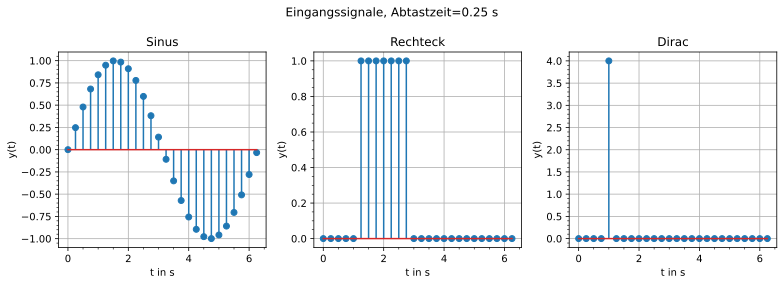

In [5]:
# Figure and Axis definition
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=[11, 4])
X_LABEL = "t in s"
Y_LABEL = "y(t)"

# Figure
fig.suptitle(f"Eingangssignale, Abtastzeit={SAMPLE_RATE} s")
# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.750)

# Axis 0
ax_0 = fig.add_subplot(axs[0])

ax_0.stem(x, y_sin, label="Label 1")  # Plot some data on the axes.

# ax_0.set_xlim(0.0, 2 * np.pi)
# ax_0.set_ylim(-1.0, 1.0)

ax_0.set_title("Sinus")
ax_0.set_xlabel(X_LABEL)
ax_0.set_ylabel(Y_LABEL)

# ax_0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax_0.grid(True)
ax_0.minorticks_on()
# ax_0.set_ylim(bottom=0)
# ax_0.set_xlim(botton=0)

# Axis 1
ax_1 = fig.add_subplot(axs[1])

ax_1.stem(x, y_rec, label="Label 1")  # Plot some data on the axes.

# ax_1.set_xlim(0.0, 2 * np.pi)
# ax_1.set_ylim(-1.0, 1.0)

ax_1.set_title("Rechteck")
ax_1.set_xlabel(X_LABEL)
ax_1.set_ylabel(Y_LABEL)

# ax_1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax_1.grid(True)
ax_1.minorticks_on()
# ax_1.set_ylim(bottom=0)
# ax_1.set_xlim(botton=0)

# Axis 2
ax_2 = fig.add_subplot(axs[2])

ax_2.stem(x, y_dir, label="Label 1")  # Plot some data on the axes.

# ax_2.set_xlim(0.0, 2. * np.pi)
# ax_2.set_ylim(0.0, 1.0 - EPS_FLOAT)

ax_2.set_title("Dirac")
ax_2.set_xlabel(X_LABEL)
ax_2.set_ylabel(Y_LABEL)

# ax_2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax_2.grid(True)
ax_2.minorticks_on()
# ax_2.set_ylim(bottom=0)
# ax_2.set_xlim(botton=0)

# show plot
plt.tight_layout()
plt.show()

In [6]:
def impuls_response_fo_lowpass(t, tau):
    """
    Berechnung der Impulsantwort eines Tiefpasses 1. Ordnung.
    """
    h = 1./tau * np.exp(-t/tau)
    return h

In [7]:
y_impulse_response = np.array([impuls_response_fo_lowpass(t, TAU_LOWPASS) for t in x])

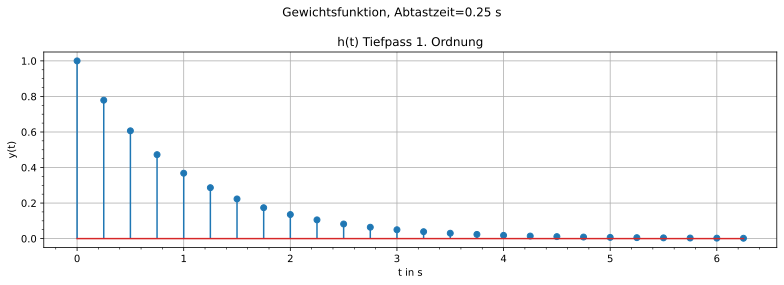

In [8]:
# Figure and Axis definition
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=[11, 4])
X_LABEL = "t in s"
Y_LABEL = "y(t)"

# Figure
fig.suptitle(f"Gewichtsfunktion, Abtastzeit={SAMPLE_RATE} s")
# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.750)

# Axis 0
ax_0 = fig.add_subplot(axs)

ax_0.stem(x, y_impulse_response, label="Label 1")  # Plot some data on the axes.

# ax_0.set_xlim(0.0, 2 * np.pi)
# ax_0.set_ylim(-1.0, 1.0)

ax_0.set_title("h(t) Tiefpass 1. Ordnung")
ax_0.set_xlabel(X_LABEL)
ax_0.set_ylabel(Y_LABEL)

# ax_0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax_0.grid(True)
ax_0.minorticks_on()
# ax_0.set_ylim(bottom=0)
# ax_0.set_xlim(botton=0)

# show plot
plt.tight_layout()
plt.show()

In [9]:
y_sin_falt = np.convolve(y_impulse_response, np.flip(y_sin), mode="same")
y_rec_falt = np.convolve(y_impulse_response, np.flip(y_rec), mode="same")
y_dir_falt = np.convolve(y_impulse_response, np.flip(y_dir), mode="same")

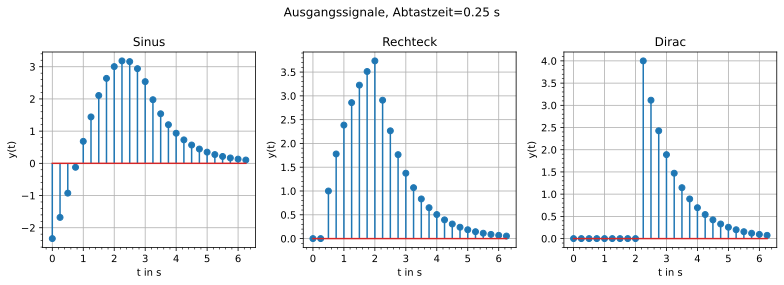

In [10]:
# Figure and Axis definition
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=[11, 4])
X_LABEL = "t in s"
Y_LABEL = "y(t)"

# Figure
fig.suptitle(f"Ausgangssignale, Abtastzeit={SAMPLE_RATE} s")
# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.750)

# Axis 0
ax_0 = fig.add_subplot(axs[0])

ax_0.stem(x, y_sin_falt, label="Label 1")  # Plot some data on the axes.

# ax_0.set_xlim(0.0, 2 * np.pi)
# ax_0.set_ylim(-1.0, 1.0)

ax_0.set_title("Sinus")
ax_0.set_xlabel(X_LABEL)
ax_0.set_ylabel(Y_LABEL)

# ax_0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax_0.grid(True)
ax_0.minorticks_on()
# ax_0.set_ylim(bottom=0)
# ax_0.set_xlim(botton=0)

# Axis 1
ax_1 = fig.add_subplot(axs[1])

ax_1.stem(x, y_rec_falt, label="Label 1")  # Plot some data on the axes.

# ax_1.set_xlim(0.0, 2 * np.pi)
# ax_1.set_ylim(-1.0, 1.0)

ax_1.set_title("Rechteck")
ax_1.set_xlabel(X_LABEL)
ax_1.set_ylabel(Y_LABEL)

# ax_1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax_1.grid(True)
ax_1.minorticks_on()
# ax_1.set_ylim(bottom=0)
# ax_1.set_xlim(botton=0)

# Axis 2
ax_2 = fig.add_subplot(axs[2])

ax_2.stem(x, y_dir_falt, label="Label 1")  # Plot some data on the axes.

# ax_2.set_xlim(0.0, 2. * np.pi)
# ax_2.set_ylim(0.0, 1.0 - EPS_FLOAT)

ax_2.set_title("Dirac")
ax_2.set_xlabel(X_LABEL)
ax_2.set_ylabel(Y_LABEL)

# ax_2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax_2.grid(True)
ax_2.minorticks_on()
# ax_2.set_ylim(bottom=0)
# ax_2.set_xlim(botton=0)

# show plot
plt.tight_layout()
plt.show()